 Mary Hennessy    10345121    CA  1-c 
  
 Description:
 
 I downloaded dataset and saved as csv files
  
 I  imported all 5 of the csv files into jupyter notebook and finally merged 3 files data, item and user 
 
 I then used this merged file: DataFrame 'df_full' for most of the exploration
 
 I had in mind to use a loop to find the average ratings per movie by occupation but also decided to try pandas melt function as I had gotten so much help with the indexing part of the loop that I couldn't really justify leaving it in isolation and the melt function is actually quite impressive
 
 The boxplots and violin plots are done using seaborn library - I also used sns for heatmaps - with just a few matplotlib graphs for data display
 
 I've included the references to material used as they occur and this really made more sense.
 
 I used excel to add missing headings to columns, to clean data re spaces and other 'ticks' and for changing the F/M gender to 1/0 as needed that for Logistic Regression
  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import*
from matplotlib import colors
import seaborn as sns
import statsmodels.api as sm
import pylab as pl
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation as cv
%matplotlib inline

In [2]:
df_data = pd.read_csv('data.csv')
df_item = pd.read_csv('item.csv')
df_genre = pd.read_csv('genre.csv')
df_occupation = pd.read_csv('occupation.csv')
df_user = pd.read_csv('user.csv')

In [3]:
pd.set_option('display.max_row', 25)

In [4]:
df_data.head(2)

,user_id,item_id,rating,timestamp
0,287,1,5,875334088
1,95,1,5,879197329


In [5]:
df_item.head(2)

,movie_id,movie_title,release_date,video release date,IMDb URL,unknown,action,adventure,animation,childrens,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,Toy Story (1995),01-Jan-95,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-95,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df_item.columns

Index([u'movie_id', u'movie_title', u'release_date', u' video release date ',
       u' IMDb URL ', u'unknown', u'action', u'adventure', u'animation',
       u'childrens', u'comedy', u'crime', u'documentary', u'drama', u'fantasy',
       u'film_noir', u'horror', u'musical', u'mystery', u'romance', u'sci_fi',
       u'thriller', u'war', u'western'],
      dtype='object')

In [7]:
df_genre.head(19)

,genre,genre_id
0,unknown,0
1,action,1
2,adventure,2
3,animation,3
4,childrens,4
5,comedy,5
6,crime,6
7,documentary,7
8,drama,8
9,fantasy,9


In [8]:
df_genre1 = df_genre.T
df_genre1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
genre,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
genre_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18


In [9]:
df_occupation.head(2)

,occupation
0,administrator
1,artist




____________________________________________________________________________________________________________________________________________________________________________________________    
User Dataframe information       
Key for Gender - changed in Excel           
Female :1     
Male   :0

_____________________________________________________________________________________________
_____________________________________________________________________________________________

In [10]:


df_user.head(2)

,user_id,age,gender,occupation,zip_code
0,1,24,0,technician,85711
1,2,53,1,other,94043


In [11]:
df_user.T

,0,1,2,3,4,5,6,7,8,9,...,932,933,934,935,936,937,938,939,940,941
user_id,1,2,3,4,5,6,7,8,9,10,...,933,934,935,936,937,938,939,940,941,942
age,24,53,23,24,33,42,57,36,29,53,...,28,61,42,24,48,38,26,32,20,48
gender,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
occupation,technician,other,writer,technician,other,executive,administrator,administrator,student,lawyer,...,student,engineer,doctor,other,educator,technician,student,administrator,student,librarian
zip_code,85711,94043,32067,43537,15213,98101,91344,5201,1002,90703,...,48105,22902,66221,32789,98072,55038,33319,2215,97229,78209


In [12]:
occupation_counts = df_user.occupation.value_counts()
occupation_counts

student          195
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
salesman          12
lawyer            12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

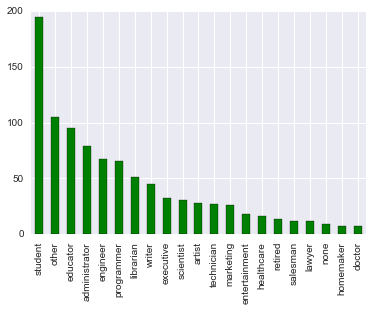

In [13]:
occupation_counts.plot.bar(color='green')

In [14]:
df_userdata = pd.merge(df_user, df_data, left_on='user_id', right_on='user_id')
df_userdata

,user_id,age,gender,occupation,zip_code,item_id,rating,timestamp
0,1,24,0,technician,85711,1,5,874965758
1,1,24,0,technician,85711,6,5,887431973
2,1,24,0,technician,85711,9,5,878543541
3,1,24,0,technician,85711,12,5,878542960
4,1,24,0,technician,85711,13,5,875071805
5,1,24,0,technician,85711,14,5,874965706
6,1,24,0,technician,85711,15,5,875071608
7,1,24,0,technician,85711,16,5,878543541
8,1,24,0,technician,85711,19,5,875071515
9,1,24,0,technician,85711,32,5,888732909


In [15]:
#df_userdata.to_excel('userdata.xlsx', sheet_name='Sheet1')

In [16]:
df_full= pd.merge(df_userdata, df_item,  left_on='item_id', right_on='movie_id')
df_full

,user_id,age,gender,occupation,zip_code,item_id,rating,timestamp,movie_id,movie_title,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,24,0,technician,85711,1,5,874965758,1,Toy Story (1995),...,0,0,0,0,0,0,0,0,0,0
1,2,53,1,other,94043,1,4,888550871,1,Toy Story (1995),...,0,0,0,0,0,0,0,0,0,0
2,5,33,1,other,15213,1,4,875635748,1,Toy Story (1995),...,0,0,0,0,0,0,0,0,0,0
3,6,42,0,executive,98101,1,4,883599478,1,Toy Story (1995),...,0,0,0,0,0,0,0,0,0,0
4,10,53,0,lawyer,90703,1,4,877888877,1,Toy Story (1995),...,0,0,0,0,0,0,0,0,0,0
5,13,47,0,educator,29206,1,3,882140487,1,Toy Story (1995),...,0,0,0,0,0,0,0,0,0,0
6,15,49,1,educator,97301,1,1,879455635,1,Toy Story (1995),...,0,0,0,0,0,0,0,0,0,0
7,16,21,0,entertainment,10309,1,5,877717833,1,Toy Story (1995),...,0,0,0,0,0,0,0,0,0,0
8,17,30,0,programmer,6355,1,4,885272579,1,Toy Story (1995),...,0,0,0,0,0,0,0,0,0,0
9,18,35,1,other,37212,1,5,880130802,1,Toy Story (1995),...,0,0,0,0,0,0,0,0,0,0


In [17]:
#excel wont accept as more that 65,530 rows
#df_full.to_excel('full.xlsx', sheet_name='Sheet1')

In [18]:
totals = df_full.groupby(['occupation','age','rating'])['unknown', 'action', 'adventure',
 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
 'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western'].sum()
totals

unknown  action  adventure  animation  childrens  \
occupation    age rating                                                     
administrator 21  1             0       0          0          0          0   
                  2             0       0          0          0          0   
                  3             0       1          0          0          0   
                  4             0       0          1          0          1   
                  5             0      12          9          0          0   
              22  1             0       0          0          0          0   
                  2             0       5          2          0          0   
                  3             0       9          4          0          0   
                  4             0      10          4          0          1   
                  5             0      10          4          0          0   
              23  1             0       4          2          0          1   
                  2             0       4          0          0          0   
...                           ...     ...        ...        ...        ...   
writer        52  2             0       3          0          1          1   
                  3             0       9          6          1          0   
                  4             0      10          6          3          2   
                  5             0      11          8          1          2   
              56  2             0       0          0          0          0   
                  3             0       0          0          0          0   
                  4             0       0          0          0          0   
                  5             0       0          0          0          0   
              60  2             0       2          0          0          0   
                  3             0       3          2          0          0   
                  4             0       9          2          0          1   
                  5             0       3          1          0          0   

                          comedy  crime  documentary  drama  fantasy  \
occupation    age rating                                               
administrator 21  1            1      0            0      0        0   
                  2            0      1            0      1        0   
                  3            1      1            0      0        0   
                  4            1      0            0      5        0   
                  5            7      7            2     22        1   
              22  1            4      0            0      2        0   
                  2            3      1            0      2        0   
                  3            6      2            0      8        0   
                  4           10      1            0     11        1   
                  5            7      4            0     18        0   
              23  1            3      1            0      2        1   
                  2            3      4            0      4        0   
...                          ...    ...          ...    ...      ...   
writer        52  2            3      1            0      5        0   
                  3           14      0            1      8        0   
                  4           16     10            1     40        1   
                  5           16      4            1     32        0   
              56  2            0      0            0      1        0   
                  3            0      0            0      2        0   
                  4            1      0            1      8        0   
                  5            2      1            0      7        0   
              60  2            1      0            0      1        0   
                  3            0      1            0      2        0   
                  4            8      3            0      7        0   
                  5            5      8        

In [19]:
totals_occupation_genre = df_full.groupby(['occupation','rating'])['unknown', 'action', 'adventure',
 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
 'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western'].sum()
totals_occupation_genre

unknown  action  adventure  animation  childrens  \
occupation    rating                                                     
administrator 1             0      93         65          8         34   
              2             0     203        108         18         51   
              3             0     575        302         47        145   
              4             0     584        320         76        138   
              5             0     403        225         54         94   
artist        1             0      34         26         16         27   
              2             0      61         21          9         16   
              3             0     141         93         33         60   
              4             0     170         88         34         49   
              5             0     122         83         29         50   
doctor        1             0       4          1          0          1   
              2             0      11          8          2          0   
...                       ...     ...        ...        ...        ...   
student       4             0    2088       1067        329        585   
              5             0    1226        690        177        269   
technician    1             0      59         32          6         21   
              2             0     131         72         14         31   
              3             0     330        163         38         66   
              4             1     373        190         42         73   
              5             0     186        101         32         30   
writer        1             1     140         69          9         26   
              2             0     234        114         21         48   
              3             0     302        164         53        129   
              4             0     349        198         59        109   
              5             0     267        129         34         55   

                      comedy  crime  documentary  drama  fantasy  film_noir  \
occupation    rating                                                          
administrator 1          142     22            1     92        6          2   
              2          255     54            6    257        9          7   
              3          632    154            7    700       32         28   
              4          719    180           18   1192       29         66   
              5          455    155           16    858       18         44   
artist        1           57      8            0     42        5          1   
              2           75     20            2     81        2          2   
              3          133     49            7    214        5          9   
              4          193     76            9    319        5         21   
              5          159     48           16    301        7         31   
doctor        1            5      1            0      6        0          0   
              2           21      2            2     15        1          0   
...                      ...    ...          ...    ...      ...        ...   
student       4         2286    680           43   2840       93         98   
              5         1159    433           36   2002       32         82   
technician    1           59     16            1     35        1          0   
              2          150     29            1    120        8          1   
              3          325     78            3    323       15         14   
              4          373    103           12    544       12         14   
              5          149     49            7    273        2         17   
writer        1          149     42            0    126        4          4   
              2          243     58            2    304       16          8   
              3          490    119           15    569       22         21   
              4          420    166           20

In [20]:
totals_occupation = df_full.groupby(['occupation'])['unknown', 'action', 'adventure',
 'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
 'film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western'].sum()
totals_occupation

,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
occupation,,,,,,,,,,,,,,,,,,,
administrator,0,1858,1020,203,462,2203,565,48,3099,94,147,391,354,385,1539,942,1570,786,168
artist,0,528,311,121,202,617,201,34,957,24,64,102,157,164,462,308,476,225,29
doctor,0,110,57,22,28,168,41,13,238,7,9,18,27,27,133,56,117,44,5
educator,1,1962,1128,263,593,2708,710,107,4281,112,202,421,481,532,2006,986,1767,1005,189
engineer,1,2277,1299,363,629,2438,611,51,3152,125,145,414,441,363,1467,1221,1712,858,180
entertainment,1,499,249,62,104,574,207,23,804,25,47,192,68,132,342,289,554,174,27
executive,1,808,436,91,232,951,287,26,1407,50,58,155,131,203,592,391,811,312,49
healthcare,0,577,323,89,213,722,200,45,1297,38,50,120,126,140,499,266,563,230,47
homemaker,0,92,41,9,25,93,25,2,104,3,4,9,15,32,59,30,95,28,0


In [21]:
#Notes:

#http://stackoverflow.com/questions/29941384/how-can-i-use-melt-to-reshape-a-pandas-dataframe-to-a-list-creating-an-index
#http://connor-johnson.com/2014/08/28/tidyr-and-pandas-gather-and-melt/

# melt works best here: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html

#pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None)
#“Unpivots” a DataFrame from wide format to long format, optionally leaving identifier variables set.

#genres: ['unknown', 'action', 'adventure','animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy','film_noir', 'horror', 'musical', 'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western'].sum()




mean_scores_prep_a = pd.melt(df_full, id_vars=['occupation','rating','user_id','age', 'gender','zip_code','item_id','timestamp','movie_id','movie_title','release_date',' video release date ',' IMDb URL '], var_name = 'movie_genre',value_name ='value')
mean_scores_prep_b = mean_scores_prep_a[mean_scores_prep_a['value']==1] [['movie_genre','occupation','rating','user_id','age', 'gender','zip_code','item_id','timestamp','movie_id','movie_title','release_date',' video release date ',' IMDb URL ']]                
mean_scores = pd.pivot_table(mean_scores_prep_b, aggfunc = np.mean, index = ['occupation'], columns=['movie_genre'], values =['rating'] )



#mean_scores_prep_a#[1896730:1896780] # last record is 1896769 (total here 1896770 rows)
#mean_scores_prep_b #[212180:212230] #last record is 1896585 (total now 212215 rows)
mean_scores # 21 rows

rating                                                    \
movie_genre      action adventure animation childrens    comedy     crime   
occupation                                                                  
administrator  3.538751  3.521569  3.738916  3.448052  3.494780  3.693805   
artist         3.539773  3.581994  3.421488  3.391089  3.521880  3.676617   
doctor         3.618182  3.561404  3.363636  3.500000  3.559524  3.804878   
educator       3.581549  3.619681  3.593156  3.397976  3.564993  3.752113   
engineer       3.488801  3.538876  3.614325  3.386328  3.433552  3.666121   
entertainment  3.406814  3.365462  3.467742  3.086538  3.296167  3.710145   
executive      3.532178  3.529817  3.560440  3.202586  3.098843  3.505226   
healthcare     3.053726  3.012384  2.865169  2.718310  2.713296  3.045000   
homemaker      3.456522  3.439024  3.111111  2.920000  2.967742  3.360000   
lawyer         3.692580  3.859155  3.771429  3.373494  3.493478  3.747664   
librarian      3.401822  3.404851  3.553459  3.389655  3.456853  3.654054   
marketing      3.484277  3.434959  3.278481  3.092025  3.360748  3.515528   
none           3.724252  3.706250  3.976744  3.725275  3.678431  3.594595   
other          3.475674  3.554158  3.672209  3.488082  3.406951  3.595411   
programmer     3.565891  3.595968  3.660256  3.344768  3.428040  3.669670   
retired        3.410072  3.387500  3.628571  3.281818  3.458984  3.613139   
salesman       3.653153  3.717172  3.666667  3.500000  3.187898  3.860759   
scientist      3.422261  3.442105  3.639344  3.481481  3.446729  3.813559   
student        3.465740  3.486909  3.563596  3.359429  3.379021  3.651815   
technician     3.459685  3.458781  3.606061  3.271493  3.381629  3.509091   
writer         3.285604  3.302671  3.500000  3.324251  3.268742  3.502008   

                                                                             \
movie_genre   documentary     drama   fantasy film_noir    horror   musical   
occupation                                                                    
administrator    3.875000  3.796063  3.468085  3.972789  3.393862  3.596045   
artist           4.147059  3.789969  3.291667  4.234375  3.460784  3.414013   
doctor           3.461538  3.785714  3.000000  4.111111  3.500000  3.592593   
educator         3.775701  3.811259  3.508929  4.064356  3.171021  3.594595   
engineer         3.666667  3.701777  3.200000  3.924138  3.282609  3.517007   
entertainment    3.869565  3.605721  2.960000  3.914894  3.229167  3.367647   
executive        2.192308  3.477612  2.840000  3.603448  3.200000  3.625954   
healthcare       2.600000  2.982267  2.789474  3.100000  2.550000  3.277778   
homemaker        3.500000  3.538462  1.666667  3.250000  3.222222  2.800000   
lawyer           3.900000  3.802947  3.142857  4.500000  3.866667  3.861111   
librarian        3.812500  3.701603  3.218182  3.968750  3.168142  3.348739   
marketing        3.583333  3.608010  3.400000  4.100000  3.418605  3.298246   
none             4.000000  3.932836  3.583333  3.500000  3.857143  3.860465   
other            3.784615  3.719294  3.388889  3.842466  3.244860  3.627208   
programmer       3.725490  3.755714  3.367521  3.886525  3.290488  3.524675   
retired          3.437500  3.514443  3.363636  4.023256  3.318182  3.526882   
salesman         4.000000  3.984227  3.333333  3.785714  3.326531  3.592593   
scientist        3.882353  3.815451  3.150000  4.025641  3.385714  3.549451   
student          3.829060  3.702332  3.051429  3.832714  3.386878  3.500931   
technician       3.958333  3.694981  3.157895  4.021739  3.420732  3.457143   
writer           3.782609  3.511322  3.197183  3.968000  3.107930  3.474265   

                                                                         \
movie_genre     mystery   romance    sci_fi  thriller unknown       war   
occupation                                                                
administrator  3.763636  3.741391  3.650743  3

In [22]:
# Left this way and above in - as I prefer this but above more of my own investigations
# This is the way I prefer but I had a lot of help with this section specifically on how to index into dataframe correctly

def average_rate(rating):
    if rating.sum() <> 0:
        part1=((float(rating[0]) * 1) + (rating[1] * 2) + (rating[2] * 3) + (rating[3] * 4) + (rating[4] * 5))/ rating.sum()
        return part1
    else: return 0
    
for i in totals_occupation.index: #and col in totals_occupation:
    for col in totals_occupation:
        rating_group = df_full[(df_full.occupation == i)].groupby(['rating'])[col].sum()
        rating_values = rating_group.get_values()
        totals_occupation.ix[i,col] = average_rate(rating_values)

        
# df_full.rating.sum()        
totals_occupation

,unknown,action,adventure,animation,childrens,comedy,crime,documentary,drama,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
occupation,,,,,,,,,,,,,,,,,,,
administrator,0.0,3.538751,3.521569,3.738916,3.448052,3.494780,3.693805,3.875000,3.796063,3.468085,3.972789,3.393862,3.596045,3.763636,3.741391,3.650743,3.604459,3.924936,3.702381
artist,0.0,3.539773,3.581994,3.421488,3.391089,3.521880,3.676617,4.147059,3.789969,3.291667,4.234375,3.460784,3.414013,3.792683,3.729437,3.818182,3.590336,3.902222,3.862069
doctor,0.0,3.618182,3.561404,3.363636,3.500000,3.559524,3.804878,3.461538,3.785714,3.000000,4.111111,3.500000,3.592593,3.962963,3.699248,3.500000,3.769231,4.159091,3.800000
educator,3.0,3.581549,3.619681,3.593156,3.397976,3.564993,3.752113,3.775701,3.811259,3.508929,4.064356,3.171021,3.594595,3.789474,3.758724,3.622718,3.581777,3.908458,3.851852
engineer,3.0,3.488801,3.538876,3.614325,3.386328,3.433552,3.666121,3.666667,3.701777,3.200000,3.924138,3.282609,3.517007,3.633609,3.644853,3.583948,3.489486,3.839161,3.600000
entertainment,4.0,3.406814,3.365462,3.467742,3.086538,3.296167,3.710145,3.869565,3.605721,2.960000,3.914894,3.229167,3.367647,3.477273,3.488304,3.529412,3.395307,3.804598,3.592593
executive,1.0,3.532178,3.529817,3.560440,3.202586,3.098843,3.505226,2.192308,3.477612,2.840000,3.603448,3.200000,3.625954,3.600985,3.472973,3.626598,3.521578,3.823718,3.673469
healthcare,0.0,3.053726,3.012384,2.865169,2.718310,2.713296,3.045000,2.600000,2.982267,2.789474,3.100000,2.550000,3.277778,3.121429,2.995992,3.030075,3.049734,3.265217,2.829787
homemaker,0.0,3.456522,3.439024,3.111111,2.920000,2.967742,3.360000,3.500000,3.538462,1.666667,3.250000,3.222222,2.800000,3.687500,3.525424,3.200000,3.357895,3.500000,0.000000


_____________________________________________________________________________________________
_____________________________________________________________________________________________

The two heat maps are the same except second one has movie genre in alphabetical order  

I left in the two just for illustration having used the two data prep methods above.

Just to note the heatmaps are in reverse order ie the one directly below is for the nested method directly above here.

Annoyingly I couldn't get rid of the 'None' in front of 'movie_genre' on the x label in heatmap two - there must be some way but I tried several things in vain such as label = False which works for the .

_____________________________________________________________________________________________
_____________________________________________________________________________________________

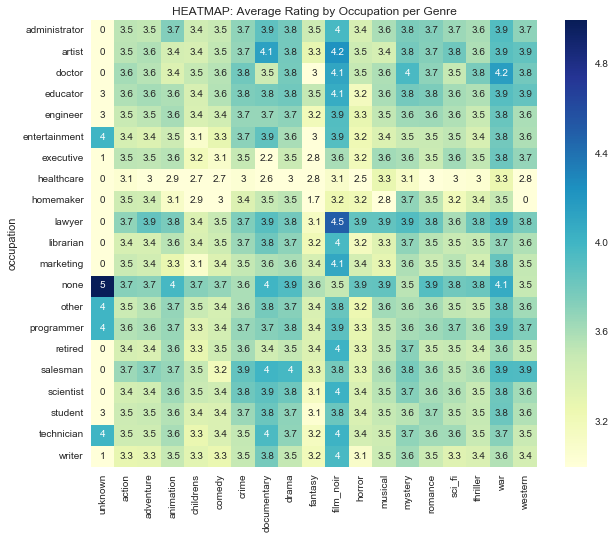

In [23]:
# https://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html
plt.figure(figsize=(10, 8))
sns.plt.title ('HEATMAP: Average Rating by Occupation per Genre')
sns.heatmap(totals_occupation, vmin =3, vmax =5, cmap='YlGnBu', annot = True)

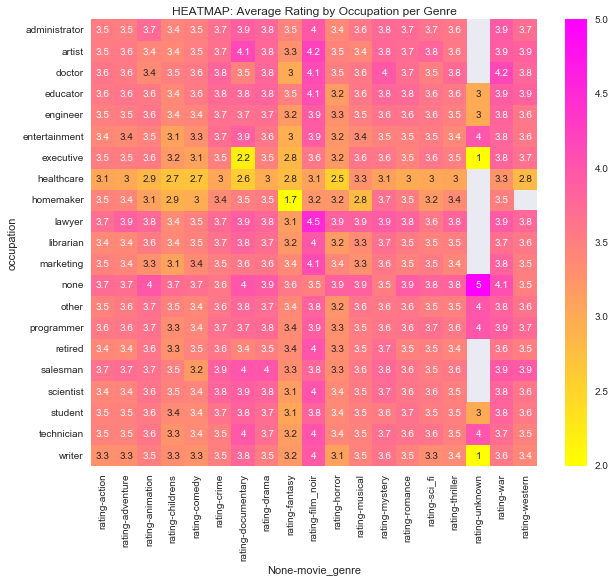

In [24]:
#I tried to get rid of the 'None' in front of movie_genre but can't find a way - a small but annoying thing
plt.figure(figsize=(10, 8))
sns.plt.title ('HEATMAP: Average Rating by Occupation per Genre')
sns.heatmap(mean_scores, annot=True, vmin =2, vmax =5,cmap='spring_r' )

#cbar_kws={"orientation": "horizontal"}


In [25]:
exec_documentary = df_full[(df_full.occupation == 'executive')&(df_full.documentary)]
exec_documentary.head(2)

,user_id,age,gender,occupation,zip_code,item_id,rating,timestamp,movie_id,movie_title,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
1811,6,42,0,executive,98101,32,4,883601311,32,Crumb (1994),...,0,0,0,0,0,0,0,0,0,0
2222,213,33,0,executive,55345,48,5,878955848,48,Hoop Dreams (1994),...,0,0,0,0,0,0,0,0,0,0


In [26]:
art_documentary = df_full[(df_full.occupation == 'artist')&(df_full.documentary)]
art_documentary.head(2)

,user_id,age,gender,occupation,zip_code,item_id,rating,timestamp,movie_id,movie_title,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
1817,23,30,1,artist,48197,32,3,874785809,32,Crumb (1994),...,0,0,0,0,0,0,0,0,0,0
1818,31,24,0,artist,10003,32,5,881548030,32,Crumb (1994),...,0,0,0,0,0,0,0,0,0,0


In [27]:
lib_drama = df_full[(df_full.occupation == 'librarian')&(df_full.drama)]
lib_drama.head(2)

,user_id,age,gender,occupation,zip_code,item_id,rating,timestamp,movie_id,movie_title,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
469,662,55,0,librarian,19102,6,5,880571006,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,...,0,0,0,0,0,0,0,0,0,0
470,707,56,1,librarian,19146,6,3,886285627,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,...,0,0,0,0,0,0,0,0,0,0


In [28]:
sales_drama = df_full[(df_full.occupation == 'salesman')&(df_full.drama)]
sales_drama.head(2)

,user_id,age,gender,occupation,zip_code,item_id,rating,timestamp,movie_id,movie_title,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
549,211,66,0,salesman,32605,9,3,879460172,9,Dead Man Walking (1995),...,0,0,0,0,0,0,0,0,0,0
571,287,21,0,salesman,31211,9,5,875334089,9,Dead Man Walking (1995),...,0,0,0,0,0,0,0,0,0,0


In [29]:
#sns notes: whis= 1.5 etc, 'notch' for CI for median
#help(sns.factorplot)
#Included violin plots here two because I think they give a good look into boxplot blueprint

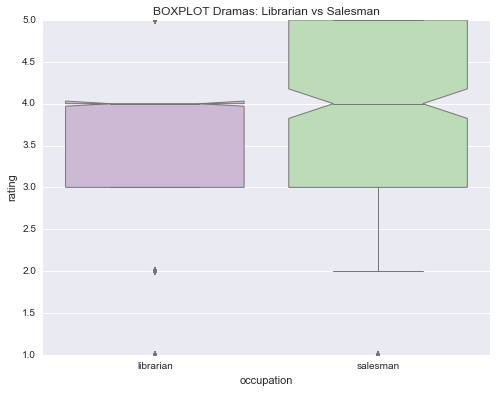

In [30]:
plt.figure(figsize=(8, 6))
sns.set_style('darkgrid')# or 'ticks' for no hoizontal lines
sns.plt.title('BOXPLOT Dramas: Librarian vs Salesman')
#full = sns.load_dataset('df_full')
ax = sns.boxplot(x='occupation', y='rating' ,data = lib_drama,  palette ='PRGn',order=['librarian','salesman'],linewidth = 1, whis =0.5, notch = True)
ax = sns.boxplot(x='occupation', y='rating' ,data = sales_drama,  palette ='PRGn',order=['librarian','salesman'],linewidth = 1, whis=0.5, notch = True)
#sns.despine(offset=1, trim=True)


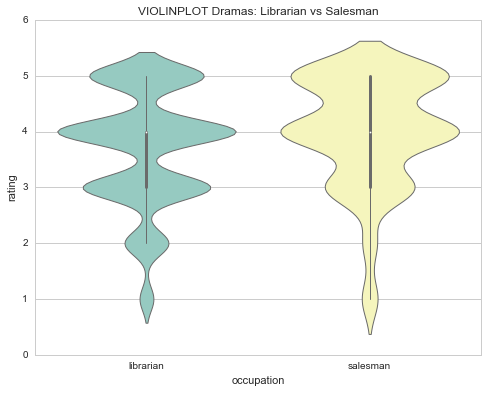

In [31]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')# or 'ticks' for no hoizontal lines
sns.plt.title('VIOLINPLOT Dramas: Librarian vs Salesman')
#full = sns.load_dataset('df_full')
ax = sns.violinplot(x='occupation', y='rating' ,data = lib_drama,  palette ='Set3',order=['librarian','salesman'],linewidth = 1, whis =0.5, notch = True)
ax = sns.violinplot(x='occupation', y='rating' ,data = sales_drama,  palette ='Set3',order=['librarian','salesman'],linewidth = 1, whis=0.5, notch = True)
#sns.despine(offset=1, trim=True)


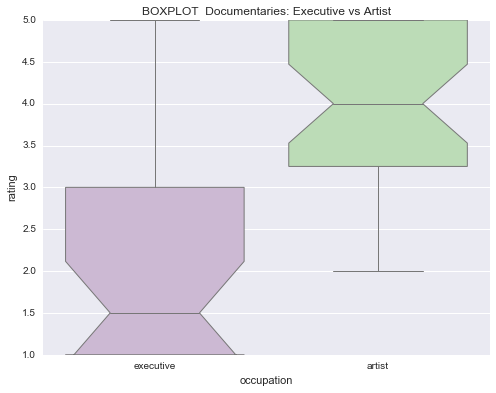

In [32]:
plt.figure(figsize=(8, 6))

sns.set_style('darkgrid')
sns.plt.title ('BOXPLOT  Documentaries: Executive vs Artist')

#full = sns.load_dataset('df_full')
ax = sns.boxplot(x='occupation', y='rating' ,data = exec_documentary,  palette ='PRGn',order=['executive','artist'],linewidth = 1, notch = True)
ax = sns.boxplot(x='occupation', y='rating' ,data = art_documentary,  palette ='PRGn',order=['executive','artist'],linewidth = 1, notch = True)
#sns.despine(offset=1, trim=True)

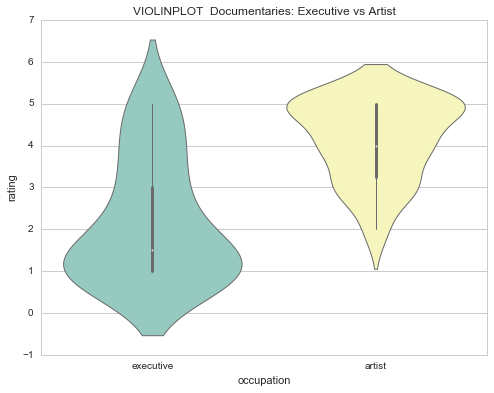

In [33]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.plt.title ('VIOLINPLOT  Documentaries: Executive vs Artist')
#full = sns.load_dataset('df_full')
ax = sns.violinplot(x='occupation', y='rating' ,data = exec_documentary,  palette ='Set3',order=['executive','artist'],linewidth = 1, notch = True)
ax = sns.violinplot(x='occupation', y='rating' ,data = art_documentary,  palette ='Set3',order=['executive','artist'],linewidth = 1, notch = True)
#sns.despine(offset=1, trim=True)

In [34]:
# Logistic regression starts here

In [35]:
df_full.age.describe()

count    99830.00000
mean        32.98842
std         11.56367
min          7.00000
25%         24.00000
50%         30.00000
75%         40.00000
max         73.00000
Name: age, dtype: float64

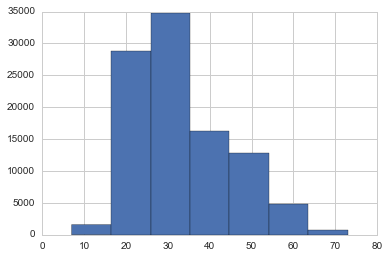

In [36]:
df_full.age.hist(bins =7)

In [37]:
df_full.rating.describe()

count    99830.000000
mean         3.530071
std          1.125441
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

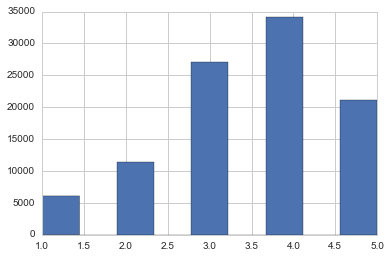

In [38]:
df_full.rating.hist(bins = 9)

In [39]:
df_full.head(2)

,user_id,age,gender,occupation,zip_code,item_id,rating,timestamp,movie_id,movie_title,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,1,24,0,technician,85711,1,5,874965758,1,Toy Story (1995),...,0,0,0,0,0,0,0,0,0,0
1,2,53,1,other,94043,1,4,888550871,1,Toy Story (1995),...,0,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn import cross_validation as cv
from sklearn.linear_model import LogisticRegression

#I omitted 'unknown' genre here 

def test_train_logit(x):
    train_set, test_set = cv.train_test_split(df_full[['gender','action','adventure','animation','childrens','comedy','crime','documentary','drama','fantasy','film_noir','horror','musical','mystery','romance','sci_fi','thriller','war','western']], test_size=x)
    y = train_set['gender']
    x = train_set.drop(train_set.columns[[0]], axis=1)

    test_y = test_set['gender']
    test_x = test_set.drop(test_set.columns[[0]], axis=1)
    logistic = LogisticRegression()
    logistic.fit(x,y)
    logistic.predict(test_x)
    return (logistic.score(test_x, test_y), logistic.coef_)

print  " \nRegression  Coefficients order is: 'action','adventure','animation','childrens','comedy','crime','documentary','drama','fantasy','film_noir','horror','musical','mystery','romance','sci_fi','thriller','war','western'\n"    

test_split = [.4,.35,.3,.25,.2] # try different test:train ratios
for split in test_split:
    accuracy = []
    coefficients = []
    #np.mean((logistic.predict(test_x)-(test_y)**2)
    for i in range (3): # doing 3 here for shortness - in reality would run many more per ratio split and average
        logit = test_train_logit(split)
        accuracy.append(logit[0])
        coefficients.append(logit[1])
        
    print  ' Test:Train split now is ', split,':',1-split
    print  ' Averaged accuracy of the model: ',sum(accuracy)/3,'\n Coefficients: ',coefficients


 
Regression  Coefficients order is: 'action','adventure','animation','childrens','comedy','crime','documentary','drama','fantasy','film_noir','horror','musical','mystery','romance','sci_fi','thriller','war','western'

 Test:Train split now is  0.4 : 0.6
 Averaged accuracy of the model:  0.741886206551 
 Coefficients:  [array([[-0.19017922, -0.05027832, -0.21978509,  0.32258298,  0.02308129,
        -0.16282913,  0.08314908,  0.11118662, -0.03796322, -0.0939507 ,
        -0.10405756,  0.04619639,  0.06952662,  0.2457767 , -0.17696503,
        -0.02189743, -0.12718816, -0.28226424]]), array([[-0.20389157, -0.01335465, -0.21817915,  0.28561631, -0.00860737,
        -0.21561005, -0.06834844,  0.07597728,  0.06012461, -0.17307134,
        -0.0867281 ,  0.05904084,  0.06430968,  0.25774668, -0.1892191 ,
        -0.03357117, -0.13564271, -0.24450483]]), array([[-0.18908993, -0.02111737, -0.1670624 ,  0.34428772,  0.03150866,
        -0.17191969,  0.01452257,  0.12598766, -0.0451079 , -0.0453

___________________________________________________________________________________________________________________
___________________________________________________________________________________________________________________

For this logistic regression - these are results of three loops (within the loop to test different ratio models) per new test/train split and the average of three is the accuracy. Of course in reality would do more loops just thought it would look very unwieldy here. 

Female:1 Male:0

Regression  Coefficients order is: 
    
1.'action',2.'adventure',3.'animation',4.'childrens',5.'comedy',6.'crime',7.'documentary',8.'drama',
9.'fantasy',10.'film_noir',11.'horror',12.'musical',13.'mystery',14.'romance',15.'sci_fi',
16.'thriller',17.'war',18.'western'


Genre most predictive of Gender

instead of the 40/60 split figures below - here the figures was for the best ratio model from section above , the 25/75 split:

Best 3 coefficients here are:  4.'childrens':0.313228 , 14.'romance' :0.267925766 18: 'western' -0.294950819 so there genre would appear to be most predictive of gender.


Accuracy of the logistic model
The accuracy hovers at just over 74 with the best for 25/75 split average accuracy of:  0.742178369895 and highest return of  0.74611840

____________________________________________________________________________________________________________________

Sample output from above with 40/60 split:

[0.7455173795452269, 0.74110988680757284, 0.7428628668736853]


Test:Train split now is  0.4 : 0.6


 Average accuracy of the model:  0.743163377742 
     
     
     Coefficients:  
     
     
                                                 childrens
        -0.19938576,  0.01593005, -0.12708934,  0.32795457,  0.04648229,
        
        -0.14487156, -0.03059875,  0.12733968, -0.06158994, -0.14579716,
        
                                                 romance
        -0.10297987,  0.02571883,  0.05703292,  0.26350223, -0.14346511,
        
                                    western
        -0.01280939, -0.13380743, -0.27554455 
        
        
        
        -0.17703922, -0.02123059, -0.1617448 ,  0.32643474,  0.0087088 ,
        -0.18397035, -0.0823896 ,  0.09735925, -0.07936723, -0.05454171,
        -0.10359703,  0.03133368,  0.00948583,  0.25626898, -0.16878137,
        -0.05404595, -0.16710839, -0.26043405
        
        -0.19492109, -0.011701  , -0.18314428,  0.3575479 , -0.00268421,
        -0.18052961, -0.04276943,  0.11329138, -0.05233104, -0.13742102,
        -0.10613916, -0.01092815,  0.06552888,  0.25209888, -0.18129162,
        -0.03052027, -0.14127435, -0.24808462
        
        
____________________________________________________________________________________________________________________
____________________________________________________________________________________________________________________

In [41]:
# rerun here with just the three best coefficients - more or less same accuracy of circa 74

def test_train_logit(x):
    train_set, test_set = cv.train_test_split(df_full[['gender','childrens','romance','western']], test_size=x)
    y = train_set['gender']
    x = train_set.drop(train_set.columns[[0]], axis=1)

    test_y = test_set['gender']
    test_x = test_set.drop(test_set.columns[[0]], axis=1)
    logistic = LogisticRegression()
    logistic.fit(x,y)
    logistic.predict(test_x)
    return (logistic.score(test_x, test_y), logistic.coef_)

print  " \nRegression  Coefficients order is: 'action','adventure','animation','childrens','comedy','crime','documentary','drama','fantasy','film_noir','horror','musical','mystery','romance','sci_fi','thriller','war','western'\n"    

test_split = [.4,.35,.3,.25,.2] # try different test:train ratios
for split in test_split:
    accuracy = []
    coefficients = []
    #np.mean((logistic.predict(test_x)-(test_y)**2)
    for i in range (3): # doing 3 here for shortness - in reality would run many more per ratio split and average
        logit = test_train_logit(split)
        accuracy.append(logit[0])
        coefficients.append(logit[1])
        
    print  ' Test:Train split now is ', split,':',1-split
    print  ' Averaged accuracy of the model: ',sum(accuracy)/3,'\n Coefficients: ',coefficients


 
Regression  Coefficients order is: 'action','adventure','animation','childrens','comedy','crime','documentary','drama','fantasy','film_noir','horror','musical','mystery','romance','sci_fi','thriller','war','western'

 Test:Train split now is  0.4 : 0.6
 Averaged accuracy of the model:  0.742963037163 
 Coefficients:  [array([[ 0.32878802,  0.30570825, -0.30981818]]), array([[ 0.31355508,  0.2858386 , -0.29008377]]), array([[ 0.33685181,  0.27778095, -0.24523184]])]
 Test:Train split now is  0.35 : 0.65
 Averaged accuracy of the model:  0.739131679116 
 Coefficients:  [array([[ 0.35281853,  0.2840702 , -0.28449451]]), array([[ 0.3717147 ,  0.26992645, -0.21741986]]), array([[ 0.32134463,  0.29755299, -0.22897275]])]
 Test:Train split now is  0.3 : 0.7
 Averaged accuracy of the model:  0.741137711888 
 Coefficients:  [array([[ 0.35107243,  0.29616428, -0.31229206]]), array([[ 0.33157344,  0.31501613, -0.24723002]]), array([[ 0.32145107,  0.28840377, -0.26629519]])]
 Test:Train split no